1) [3v] Compare the performance of 𝑘NN with 𝑘 =5 and naïve Bayes with Gaussian assumption 
(consider all remaining parameters for each classifier as sklearn’s default): 

a. Plot two boxplots with the fold accuracies for each classifier.

Cross validation:  StratifiedKFold(n_splits=10, random_state=0, shuffle=True)


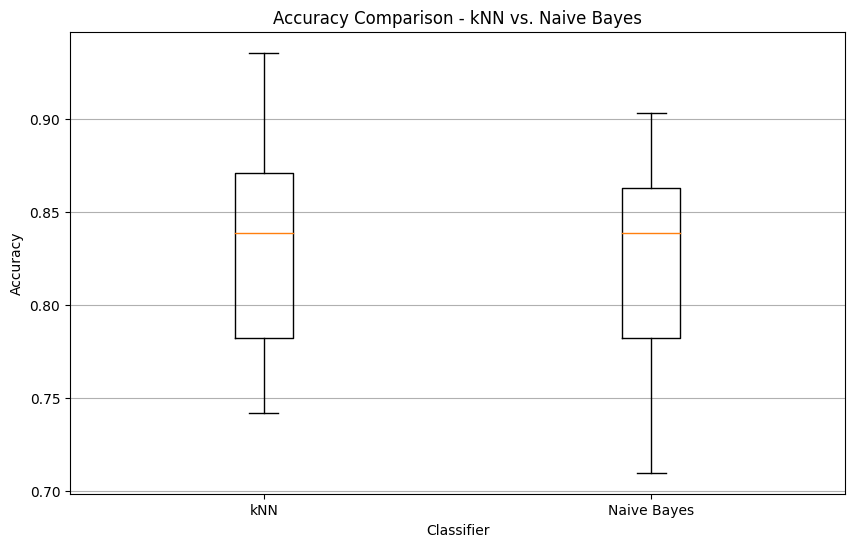

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.io.arff import loadarff


data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])

x = (df.iloc[:, :-1]).astype(np.float64)
y = (df.iloc[:, -1]).astype(str)

# Defenition of the models
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()

# Cross validation
cross_v = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
print( cross_v)

# KNN
knn_scores = cross_val_score(knn, x, y, cv=cross_v, scoring='accuracy')

# Naive Bayes
nb_scores = cross_val_score(nb, x, y, cv=cross_v, scoring='accuracy')

scores = [knn_scores, nb_scores]
labels = ['kNN', 'Naive Bayes']

plt.figure(figsize=(10, 6))
plt.boxplot(scores, labels=labels)
plt.title('Accuracy Comparison - kNN vs. Naive Bayes')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.grid(axis='y')
plt.show()


b. Using scipy, test the hypothesis “𝑘NN is statistically superior to naïve Bayes regarding 
accuracy”, asserting whether is true.

2) Consider two 𝑘NN predictors with 𝑘=1 and 𝑘 =5 (uniform weights, Euclidean distance, 
all remaining parameters as default). Plot the differences between the two cumulative confusion 
matrices of the predictors. Comment.

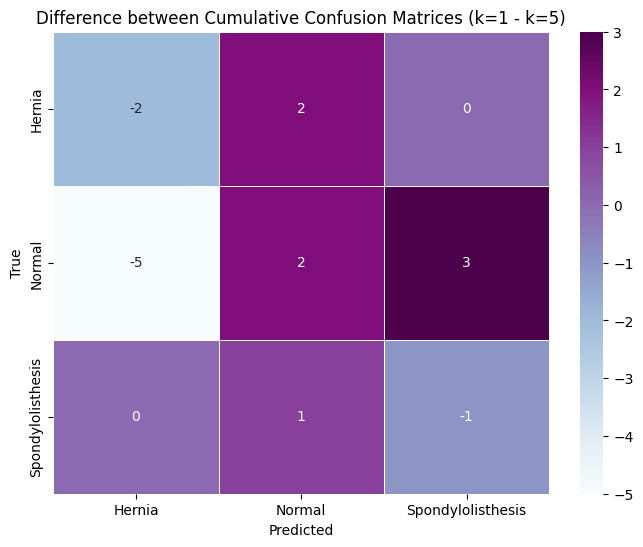

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from scipy.io.arff import loadarff
import seaborn as sns


data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
y = df['class'].astype(str)
x = df.drop('class', axis=1).astype(np.float64)


knn1 = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

cumulative_cm1 = np.zeros((3, 3))
cumulative_cm5 = np.zeros((3, 3))


for train_index, test_index in skf.split(x, y):
    
	x_train, x_test = df.iloc[train_index, :-1], df.iloc[test_index, :-1]
	y_train, y_test = df.iloc[train_index, -1], df.iloc[test_index, -1]
	x_train = x_train.astype(np.float64)
	x_test = x_test.astype(np.float64)
	y_train = y_train.astype(str)
	y_test = y_test.astype(str)
    
	knn1.fit(x_train, y_train)
	knn5.fit(x_train, y_train)

	y_pred1 = knn1.predict(x_test)
	y_pred5 = knn5.predict(x_test)

	cm1 = confusion_matrix(y_test, y_pred1)
	cm5 = confusion_matrix(y_test, y_pred5)
    
	cumulative_cm1 += cm1
	cumulative_cm5 += cm5


diff_cm = cumulative_cm1 - cumulative_cm5

diff_cm = pd.DataFrame(diff_cm, index=['Hernia', 'Normal', 'Spondylolisthesis'], columns=['Hernia', 'Normal', 'Spondylolisthesis'])
plt.figure(figsize=(8, 6))
sns.heatmap(diff_cm, annot=True, cmap="BuPu", linewidths=0.5)
plt.title("Difference between Cumulative Confusion Matrices (k=1 - k=5)")
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

Comentário: 

Ao observar a matriz resultante da diferença entre as matrizes de confusão dos dois classificadores, é posivel concluir que não há uma diferença significativa de um classificador para o outro, logo, o classificador com 𝑘=1 é tão bom quanto o classificador com 𝑘=5.



3) Considering the unique properties of column_diagnosis, identify three possible difficulties 
of naïve Bayes when learning from the given dataset

1- Devido à suposição de independência condicional feita pelo Naïve Bayes entre as variáveis, pode ocorrer uma redução na exatidão do modelo nos casos em que, de fato, existe uma dependência. Isso é evidenciado pelo fato de que as características biomédicas no dataset fornecido estão inter-relacionadas de alguma forma, o que viola essa suposição.

2- O dataset apresenta uma reduzida dimensionalidade, podendo levar a uma redução da exatidão.

3- Observa-se um desiquilíbrio no número de observações para cada classe, nomeadamente, existem 150 observações classificadas como  "spondylolisthesis" e apenas 60 como "hernia". Isso pode dificultar a aprendizgem e classificação correta das classes minoritárias, resultando em um viés em direção às classes maioritárias.